# Materials and code to create images of the LORA paper's annex (bacteroides)

In [3]:
%matplotlib inline
from pylab import *

In [4]:
rcParams['figure.figsize'] = (8,8)

In [5]:
import pandas as pd
import glob
from tqdm import tqdm
from sequana import *
from sequana.pacbio import PacbioSubreads

In [6]:
import importlib
import utils  # your module
importlib.reload(utils)

<module 'utils' from '/home/cokelaer/Work/1_Projects/LORA/paper_LORA/utils.py'>

# bacteroide fragilis

This is a multi sample data set with 7 samples. Let us start with some stats about the nanopore data set

## Download data

In [7]:
utils.download_bacteroides_data()

✅ nBFO17.fastq.gz already exists, skipping.
✅ nBFO18.fastq.gz already exists, skipping.
✅ nBFO42.fastq.gz already exists, skipping.
✅ nBFO67.fastq.gz already exists, skipping.
✅ nBFO85.fastq.gz already exists, skipping.
✅ nCCUG4856T.fastq.gz already exists, skipping.
✅ nS01.fastq.gz already exists, skipping.


rm: cannot remove 'data/bacteroides_fragilis/*TVS*gz': No such file or directory


In [8]:
filenames = glob.glob("data/bacteroides_fragilis/n*gz")
results = {}
for filename in tqdm(filenames):
    f = FastQ(filename)
    sample = filename.split("/")[-1].replace(".fastq.gz", "")
    stats = f.stats()
    results[sample] = stats
df = pd.DataFrame(results)
df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:56<00:00,  8.10s/it]


,nBFO17,nBFO18,nBFO42,nBFO67,nBFO85,nCCUG4856T,nS01
N,9.626700e+04,2.009900e+04,3.049670e+05,1.278620e+05,7.559800e+04,4.998000e+04,5.043900e+04
mean_length,6.454056e+03,6.059194e+03,6.264417e+03,5.897013e+03,7.205466e+03,5.897215e+03,8.002076e+03
total_length,6.213126e+08,1.217837e+08,1.910441e+09,7.540039e+08,5.447188e+08,2.947428e+08,4.036167e+08
N50,1.204000e+04,1.202300e+04,1.212800e+04,1.225100e+04,1.568500e+04,1.205300e+04,1.540100e+04
L50,1.441000e+04,2.716000e+03,4.273700e+04,1.595000e+04,9.269000e+03,6.557000e+03,7.270000e+03
min_length,3.900000e+01,3.200000e+01,1.300000e+01,9.000000e+00,1.100000e+01,4.400000e+01,2.300000e+01
max_length,1.093410e+05,1.116290e+05,1.343820e+05,1.234930e+05,1.371230e+05,1.158430e+05,1.258020e+05
mean_read_length,6.454056e+03,6.059194e+03,6.264417e+03,5.897013e+03,7.205466e+03,5.897215e+03,8.002076e+03
sum_read_length,6.213126e+08,1.217837e+08,1.910441e+09,7.540039e+08,5.447188e+08,2.947428e+08,4.036167e+08


In [10]:
df.T['N50']

nBFO17        12040.0
nBFO18        12023.0
nBFO42        12128.0
nBFO67        12251.0
nBFO85        15685.0
nCCUG4856T    12053.0
nS01          15401.0
Name: N50, dtype: float64

 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:23<02:19, 23.20s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nBFO17.eps in pdf/eps/png


 29%|██████████████████████████████████████████████████████████                                                                                                                                                 | 2/7 [00:28<01:03, 12.70s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nBFO18.eps in pdf/eps/png


 43%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 3/7 [01:38<02:34, 38.67s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nBFO42.eps in pdf/eps/png


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 4/7 [02:06<01:43, 34.63s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nBFO67.eps in pdf/eps/png


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5/7 [02:27<00:59, 29.61s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nBFO85.eps in pdf/eps/png


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6/7 [02:38<00:23, 23.49s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nCCUG4856T.eps in pdf/eps/png


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:54<00:00, 24.92s/it]

💾 Saved paper_images/bacteroides_fragilis/GC_vs_length_nS01.eps in pdf/eps/png


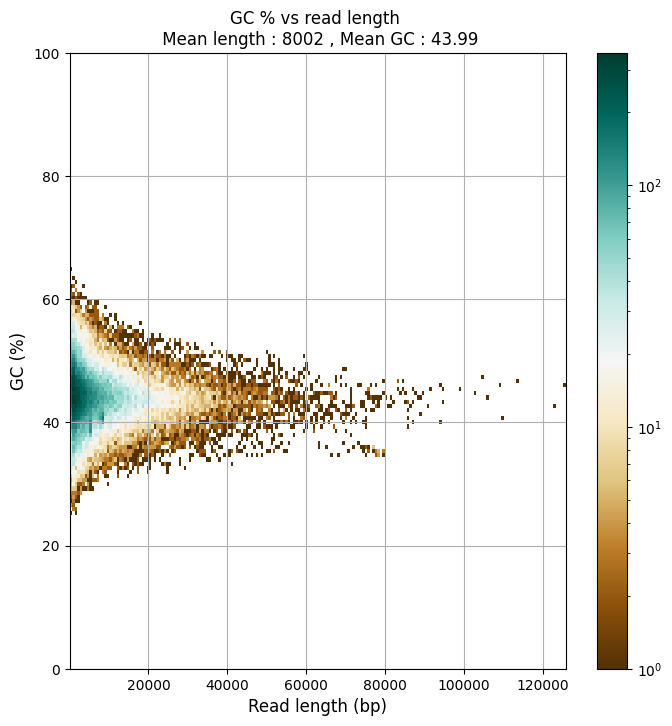

In [11]:
for sample in tqdm(df.T['N50'].index):
    f = FastQ(f"data/bacteroides_fragilis/{sample}.fastq.gz")
    f.plot_GC_read_len(maxreads=1000000)
    utils.saveall(f"paper_images/bacteroides_fragilis/GC_vs_length_{sample}")

In [13]:
## stats Nanopore

stats_nanopore = {
    "nBFO85": {'mean_read_length': 7205.466308632504, 'N': 75598, 'sum_read_length': 544718842,"N50":15685},
    "nS01": {'mean_read_length': 8002.075516961082, 'N': 50439, 'sum_read_length': 403616687,"N50":15401},
    "nCCUG5846T": {'mean_read_length': 5897.214545818328, 'N': 49980, 'sum_read_length': 294742783,"N50":12053},
    "nBFO18": {'mean_read_length': 6059.194039504453, 'N': 20099, 'sum_read_length': 121783741,"N50":12023},
    "nBFO42": {'mean_read_length': 6264.417205796037, 'N': 304967, 'sum_read_length': 1910440522,"N50":12128},
    "nBF067": {'mean_read_length': 5897.012959284229, 'N': 127862, 'sum_read_length': 754003871,"N50":12251},
    "nBFO17": {'mean_read_length': 6454.0561770908, 'N': 96267, 'sum_read_length': 621312626,"N50": 12040}
}

stats_pacbio = {
    'pBFO18': {'mean_read_length': 4352.157634425859, 'N': 137083, 'sum_read_length': 596606825, "N50":5673},
    'pBFO17': {'mean_read_length': 4482.780241589353, 'N': 145619, 'sum_read_length': 652777976, "N50":5924},
    'pS01': {'mean_read_length': 4387.623353938186, 'N': 125375, 'sum_read_length': 550098278,"N50":5819},
    'pBFO85': {'mean_read_length': 4579.228556935935, 'N': 124201, 'sum_read_length': 568744766,"N50":5973},
    'pCGUG4856T': {'mean_read_length': 4484.6185281398875, 'N': 127417, 'sum_read_length': 571416639,"N50":5956},
    'pBFO42': {'mean_read_length': 4429.161783752886, 'N': 138203, 'sum_read_length': 612123446,"N50":5705},
    'pBFO67': {'mean_read_length': 4660.7044228353025, 'N': 94713, 'sum_read_length': 441429298,"N50":6104}
}

L = 5.5e6
min([v["sum_read_length"] / L  for k,v in stats_nanopore.items()]), max([v["sum_read_length"] / L  for k,v in stats_nanopore.items()])
min([v["mean_read_length"]   for k,v in stats_nanopore.items()]), max([v["mean_read_length"]  for k,v in stats_nanopore.items()])
min([v["sum_read_length"] / 1e9  for k,v in stats_nanopore.items()]), max([v["sum_read_length"] / 1e9  for k,v in stats_nanopore.items()])
min([v["N50"]  for k,v in stats_nanopore.items()]), max([v["N50"]  for k,v in stats_nanopore.items()])

min([v["sum_read_length"] / L  for k,v in stats_pacbio.items()]), max([v["sum_read_length"] / L  for k,v in stats_pacbio.items()])
min([v["mean_read_length"]   for k,v in stats_pacbio.items()]), max([v["mean_read_length"]  for k,v in stats_pacbio.items()])
min([v["sum_read_length"] / 1e9  for k,v in stats_pacbio.items()]), max([v["sum_read_length"] / 1e9  for k,v in stats_pacbio.items()])
min([v["N50"]  for k,v in stats_pacbio.items()]), max([v["N50"]  for k,v in stats_pacbio.items()])




(5673, 6104)

  0%|                                                                                                                                                                                                                   | 0/7 [00:00<?, ?it/s]

Final number of peaks after filtering: 117
N>500 117 with max length 7323, class=III


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:10<01:00, 10.01s/it]

💾 Saved bacteroides_fragilis/repeats_nBFO17.eps in pdf/eps/png
Final number of peaks after filtering: 84
N>500 84 with max length 4507, class=class I


 29%|██████████████████████████████████████████████████████████                                                                                                                                                 | 2/7 [00:19<00:49,  9.89s/it]

💾 Saved bacteroides_fragilis/repeats_nBFO18.eps in pdf/eps/png
Final number of peaks after filtering: 54
N>500 54 with max length 5606, class=class I


 43%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 3/7 [00:29<00:39,  9.75s/it]

💾 Saved bacteroides_fragilis/repeats_nBFO42.eps in pdf/eps/png
Final number of peaks after filtering: 81
N>500 81 with max length 16216, class=III


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 4/7 [00:38<00:28,  9.53s/it]

💾 Saved bacteroides_fragilis/repeats_nBFO67.eps in pdf/eps/png
Final number of peaks after filtering: 38
N>500 38 with max length 10417, class=III


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5/7 [00:49<00:20, 10.03s/it]

💾 Saved bacteroides_fragilis/repeats_nBFO85.eps in pdf/eps/png
Final number of peaks after filtering: 68
N>500 68 with max length 7929, class=III


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6/7 [00:59<00:09,  9.85s/it]

💾 Saved bacteroides_fragilis/repeats_nS01.eps in pdf/eps/png
Final number of peaks after filtering: 27
N>500 27 with max length 12256, class=III


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:08<00:00,  9.85s/it]

💾 Saved bacteroides_fragilis/repeats_nCCUG4856T.eps in pdf/eps/png


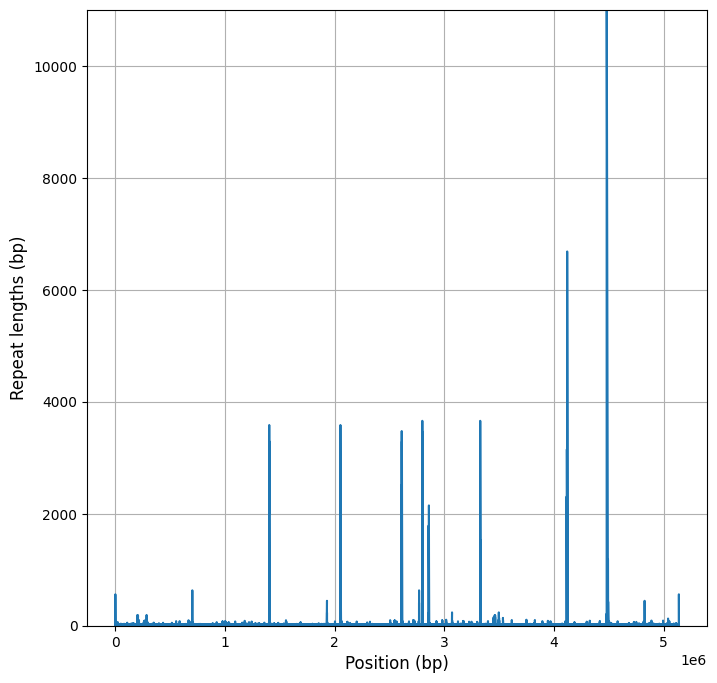

In [16]:
for sample in tqdm(['nBFO17', "nBFO18", "nBFO42", "nBFO67", "nBFO85", "nS01", "nCCUG4856T"]):
    r = Repeats(f"GoldStandard//BF/{sample}.fasta")
    r.threshold = 10
    r.plot()
    ylim([0,11000])
    grid(True)
    L = r.df_shustring.repeat_length.max()
    N = len(r.get_peak_position_and_length(500))
    if L > 7000:
        class_ = "III"
    elif N > 100:
        class_ = "II"
    else:
        class_ = "class I"
    print(f"N>500 {N} with max length {L}, class={class_}")
    utils.saveall(f"bacteroides_fragilis/repeats_{sample}")


# six isolates and polishing

In [18]:
from sequana import checkm
from sequana import BUSCO
data = []

filenames = glob.glob("metadata_busco_checkm/bacteroides_fragilis/*/*/results.txt")
for filename in filenames:

    cc = checkm.CheckM(filename)
    sample = filename.split("/")[3]
    exp = filename.split("/")[2]
    
    b = BUSCO(f"metadata_busco_checkm/bacteroides_fragilis/{exp}/{sample}/full_table.tsv")
    df = b.summary()
    datum = [sample,     df['S_pc'], df['C_pc'], df['D_pc'], df['F_pc'], df['M_pc'],cc.df.Completeness, cc.df.Contamination, cc.df['Strain heterogeneity'], exp]
    data.append(datum)
    

In [19]:
df = pd.DataFrame(data)
df.columns = ['name', 'buscoS', 'buscoC','buscoD','buscoF','buscoM','completeness','contamination','heterogenity', 'type']

rename = {
    "lora": "ONT no polishing", 
    "lora_polish_SE": "ONT polishing SE", 
    "lora_polish_PE": "ONT polishing PE",
    "lora_pacbio_flye": "PB no polishing"}
df['type'] = [rename[x] for x in df['type']]
df

,name,buscoS,buscoC,buscoD,buscoF,buscoM,completeness,contamination,heterogenity,type
0,nBFO42,47.580645,47.580645,0.000000,40.322581,12.096774,84.42,2.27,3.45,ONT no polishing
1,nCCUG4856T,47.580645,47.580645,0.000000,37.096774,15.322581,83.34,2.04,0.00,ONT no polishing
2,nBFO17,39.516129,39.516129,0.000000,41.935484,18.548387,77.55,1.82,0.00,ONT no polishing
3,nBFO67,46.774194,47.580645,0.806452,35.483871,16.935484,84.18,2.08,0.00,ONT no polishing
4,nS01,41.129032,41.129032,0.000000,45.161290,13.709677,78.81,1.54,0.00,ONT no polishing
5,nBFO85,50.000000,50.000000,0.000000,38.709677,11.290323,83.23,1.83,3.85,ONT no polishing
6,nBFO18,27.419355,27.419355,0.000000,52.419355,20.161290,75.53,2.50,0.00,ONT no polishing
7,nBFO42,96.774194,99.193548,2.419355,0.806452,0.000000,99.23,1.45,78.95,PB no polishing
8,nCCUG4856T,95.161290,99.193548,4.032258,0.806452,0.000000,99.19,0.62,83.33,PB no polishing
9,nBFO17,94.354839,97.580645,3.225806,2.419355,0.000000,98.57,2.91,65.38,PB no polishing


In [20]:
df.groupby(['type'])['buscoC'].mean()

type
ONT no polishing    42.972350
ONT polishing PE    98.156682
ONT polishing SE    98.156682
PB no polishing     98.502304
Name: buscoC, dtype: float64

# BUSCO (summing the 7 samples)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


💾 Saved paper_images/bacteroides_fragilis/contigs_busco.eps in pdf/eps/png


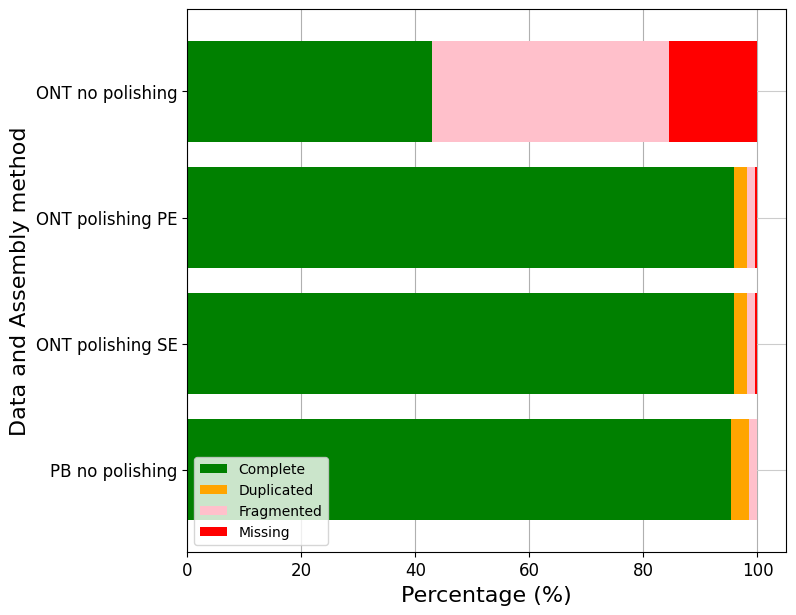

In [21]:
colors = {
    "Complete": "green",
    "Missing": "red",
    "Duplicated": "orange",
    "Fragmented": "pink"
}
df_grouped = df.groupby("type")[["buscoS", "buscoD", "buscoF", "buscoM"]].sum() / 7
df_grouped = df_grouped.iloc[::-1]
df_grouped = df_grouped.rename(
    columns={"buscoF": "Fragmented", "buscoD": "Duplicated", "buscoS": "Complete", "buscoM": "Missing"}
)
df_grouped.plot(
        kind="barh",
        stacked=True,
        figsize=(8, 6),
        fontsize=12,
        color = [colors[col] for col in df_grouped.columns if col!= "type"],
        width=0.8
)
legend(loc='lower left')
ax = gca()
ax.set_axisbelow(True)     # draw grid under bars
ax.grid(True, axis="y", linestyle="-", color="0.8")  # style as you like
tight_layout()
grid(True, zorder=-10)
_ = xlabel("Percentage (%)", fontsize=16)
_ = ylabel("Data and Assembly method", fontsize=16)
    
utils.saveall("paper_images/bacteroides_fragilis/contigs_busco")

💾 Saved paper_images/bacteroides_fragilis/checkm_completeness.eps in pdf/eps/png


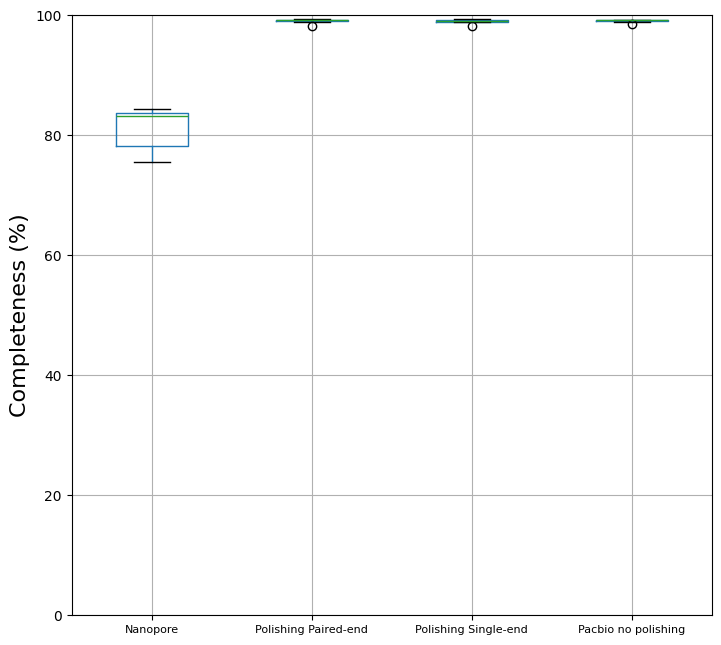

In [22]:
ax = df.boxplot('completeness', by=['type'])
ylabel("Completeness (%)", fontsize=16)
ylim([0,100])
xlabel('')
xticks([1,2,3,4], ['Nanopore', 'Polishing Paired-end', 'Polishing Single-end', 'Pacbio no polishing'], fontsize=8)
title("", fontsize=16)
ax.get_figure().suptitle('')
utils.saveall("paper_images/bacteroides_fragilis/checkm_completeness")

💾 Saved paper_images/bacteroides_fragilis/buscoC.eps in pdf/eps/png


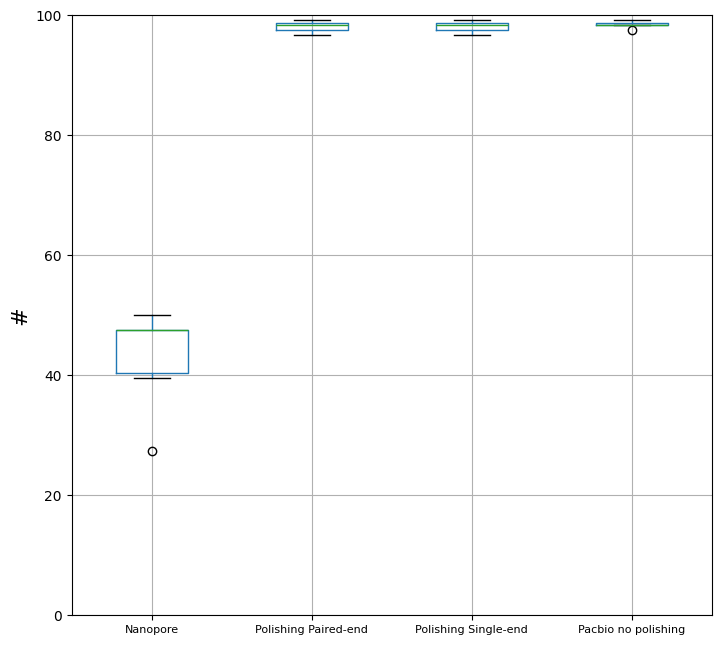

In [23]:
ax = df.boxplot('buscoC', by=['type'])
ylabel("#", fontsize=16)
ylim([0,130])
xlabel('')
xticks([1,2,3,4], ['Nanopore', 'Polishing Paired-end', 'Polishing Single-end', 'Pacbio no polishing'], fontsize=8)
title("", fontsize=16)
ax.get_figure().suptitle('')
ylim([0,100])
utils.saveall("paper_images/bacteroides_fragilis/buscoC")


## Repeats of bacteroides fragilis


 14%|█████████████████████████████                                                                                                                                                                              | 1/7 [00:10<01:00, 10.11s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nBFO17.eps in pdf/eps/png


 29%|██████████████████████████████████████████████████████████                                                                                                                                                 | 2/7 [00:20<00:51, 10.30s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nBFO18.eps in pdf/eps/png


 43%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 3/7 [00:30<00:40, 10.22s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nBFO42.eps in pdf/eps/png


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 4/7 [00:39<00:28,  9.54s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nBFO67.eps in pdf/eps/png


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 5/7 [00:49<00:19,  9.81s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nBFO85.eps in pdf/eps/png


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 6/7 [00:59<00:09,  9.94s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nCCUG4856T.eps in pdf/eps/png


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:09<00:00,  9.88s/it]

💾 Saved paper_images/bacteroides_fragilis/repeats_nS01.eps in pdf/eps/png


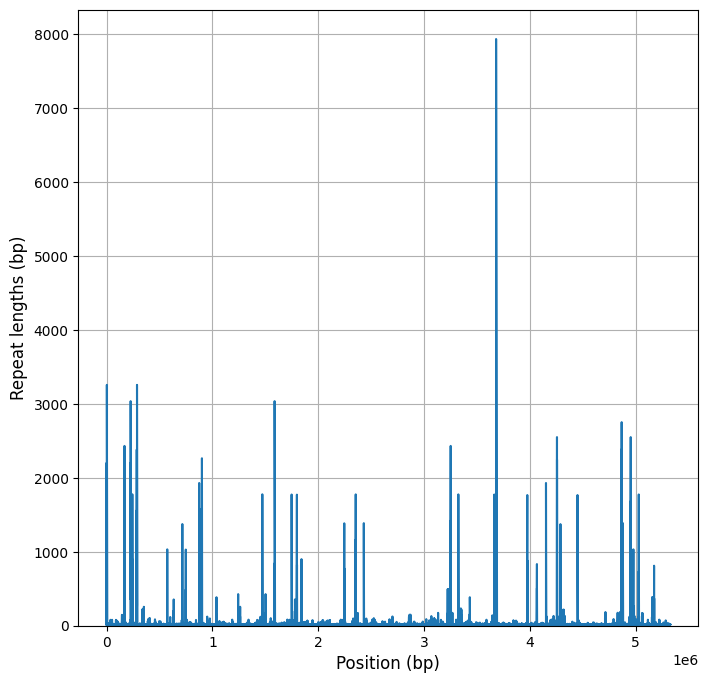

In [24]:
import glob
from tqdm import tqdm
# results of the LORA assembly using flye, nanopore and illumina data.
filenames = glob.glob("GoldStandard/BF/*fasta")
for filename in tqdm(filenames):
    f = FastA(filename)
    M = -1
    name = None
    for k,v in f.get_lengths_as_dict().items():
        if v>M:
            name = k
            M = v
    #print(name, M)
    r = Repeats(filename, name=name)
    r.threshold = 10
    r.plot()
    sample = filename.split("/")[-1].replace(".fasta", "")
    utils.saveall(f"paper_images/bacteroides_fragilis/repeats_{sample}")

# Stastistics for Table 




In [25]:
from sequana import FastA

In [26]:
f = FastA("GoldStandard/bacteroides_fragilis.fa")
L = f.get_stats()['total_length']
GC = f.GC_content()
print(L, round(GC,1))

5241700 43.1


# STATS TABLE

In [ ]:


filenames = glob.glob("data/bacteroides_fragilis/n*.gz")
for filename in filenames:
    f = FastQ(filename)
    ss = f.stats()
    doc = ss['sum_read_length'] / utils.genome_size["bacteroide"]
    print(f"{filename}; N={ss['N']}; L={ss['mean_length']}; N50={ss['N50']}; DOC={doc}")
    